### Image Classification with VGG16

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "./chest_xray/"
sz=224
arch=vgg16
bs=64

In [4]:
os.listdir(PATH)

['test', 'valid', 'models', 'train', 'tmp']

In [5]:
os.listdir(f'{PATH}valid')

['PNEUMONIA', 'NORMAL']

In [6]:
os.makedirs('/cache/tmp', exist_ok=True)
!ln -fs /cache/tmp {PATH}

In [7]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


epoch      trn_loss   val_loss   accuracy                  
    0      0.191191   0.598281   0.785256  
    1      0.135358   0.57781    0.804487                  
    2      0.106984   0.676377   0.791667                  



[array([0.67638]), 0.7916666681949909]

In [8]:
learn.fit(0.01, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      0.086368   0.636965   0.796474  
    1      0.081305   0.588279   0.823718                   
    2      0.073309   0.631344   0.802885                   



[array([0.63134]), 0.8028846169129397]

In [9]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [10]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [11]:
learn.fit(1e-2, 2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.191439   0.547184   0.786859  
    1      0.126246   0.562101   0.80609                   



[array([0.5621]), 0.8060897451180679]

In [12]:
learn.precompute=False

In [13]:
learn.fit(1e-2, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.14317    0.394407   0.850962  



[array([0.39441]), 0.8509615399898627]

In [14]:
learn.unfreeze()

In [15]:
lr=np.array([1e-4,1e-3,1e-2])

In [16]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.146272   0.343648   0.875     
    1      0.11592    0.335199   0.883013                  
    2      0.102978   0.402874   0.862179                  
    3      0.093451   0.368821   0.876603                   
    4      0.085182   0.329661   0.900641                   
    5      0.073321   0.320883   0.902244                   
    6      0.071579   0.354106   0.892628                   



[array([0.35411]), 0.8926282066565293]

In [17]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [18]:
accuracy_np(probs, y)

0.8605769230769231

### Model Performance

In [19]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[148  86]
 [  1 389]]


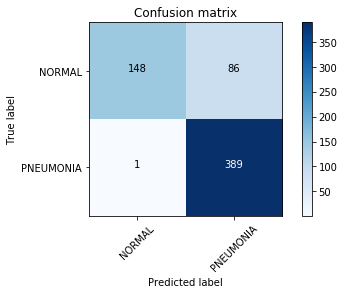

In [21]:
plot_confusion_matrix(cm, data.classes)